Question 1(a)

First we implement the forward Euler method.

In [115]:
def euler_method(f, y0, t0, tn, h):
    """
    Forward Euler method for solving an
    ordinary differential equation (ODE).

    Input:
    - f: Function such that dy/dt = f(t, y)
    - t0: Initial value of t
    - y0: Initial value of y at t=t0
    - tn: Final t
    - h: Step size

    Output:
    - t_values
    - y_values
    """
    t_values = [t0]
    y_values = [y0]
    num_steps = int((tn - t0) / h)

    for i in range(num_steps):
        t = t_values[-1]
        y = y_values[-1]
        y_1 = y + h * f(t, y)
        t_values.append(t + h)
        y_values.append(y_1)

    return t_values, y_values

In our case the function is f(y)=1-y^2

In [116]:
def diff_eq(t, y):
    return  1 - y ** 2

Now we plot the solutions for the different values of N together with the real solution

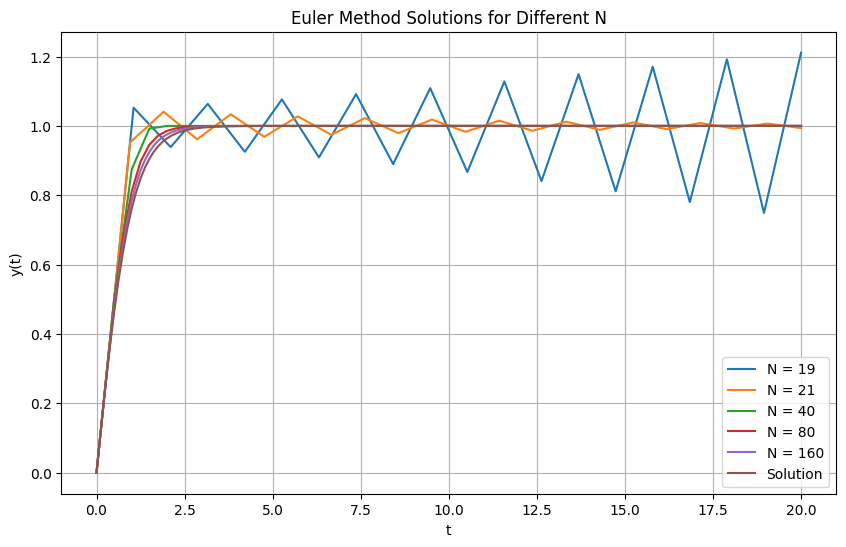

In [117]:
import matplotlib.pyplot as plt
import math

N_values = [19, 21, 40, 80, 160]
t_values = {}
y_values = {}

plt.figure(figsize=(10, 6))

for N in N_values:
    t_values[N], y_values[N] = \
        euler_method(diff_eq, 0, 0, 20, 20/N)
    plt.plot(t_values[N], y_values[N], label=f'N = {N}')

y_sol = [math.tanh(t) for t in t_values[N_values[-1]]]
plt.plot(t_values[N_values[-1]], y_sol, label=f'Solution')

plt.title('Euler Method Solutions for Different N')
plt.xlabel('t')
plt.ylabel('y(t)')
plt.legend()
plt.grid(True)
plt.show()

We see that for large N the approximation given by the Euler method is very close to the real solution.

Now we store the values of the errors.

In [61]:
e_fe = []
e_fe_end = []

for N in N_values:
    max_value = max([abs(y_values[N][k] - math.tanh(t_values[N][k])) \
                      for k in range(len(y_values[N]))])
    e_fe.append(max_value)
    e_fe_end.append(abs(y_values[N][-1] - math.tanh(t_values[N][-1])))

e_fe, e_fe_end

([0.26980422212828936,
  0.21152189118036424,
  0.11340584404423515,
  0.049976606700864235,
  0.023966059963127728],
 [0.2110648658000196, 0.0062097521785129395, 0.0, 0.0, 2.220446049250313e-16])

Question 1(b)

We repeat the same steps using Heun's method this time.

In [66]:
def heuns_method(f, y0, t0, tn, h):
    t_values = [t0]
    y_values = [y0]
    num_steps = int((tn - t0) / h)

    for i in range(num_steps):
        t = t_values[-1]
        y = y_values[-1]
        y_1 = y + h * f(t, y)
        y_next = y + 0.5 * h * (f(t, y) + f(t + h, y_1))
        t_values.append(t + h)
        y_values.append(y_next)

    return t_values, y_values

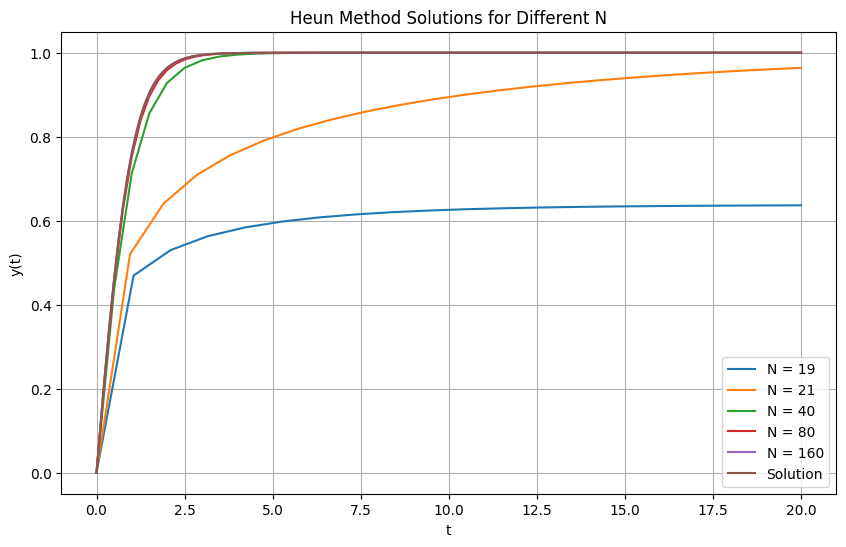

In [121]:
N_values = [19, 21, 40, 80, 160]
t_values_heun = {}
y_values_heun = {}

plt.figure(figsize=(10, 6))

for N in N_values:
    t_values_heun[N], y_values_heun[N] = \
        heuns_method(diff_eq, 0, 0, 20, 20/N)
    plt.plot(t_values_heun[N], y_values_heun[N], label=f'N = {N}')

y_sol = [math.tanh(t) for t in t_values_heun[N_values[-1]]]
plt.plot(t_values_heun[N_values[-1]], y_sol, label=f'Solution')

plt.title('Heun Method Solutions for Different N')
plt.xlabel('t')
plt.ylabel('y(t)')
plt.legend()
plt.grid(True)
plt.show()

In [118]:
e_Heun = []
e_Heun_end = []

for N in N_values:
    max_value = max([abs(y_values_heun[N][k] - \
                          math.tanh(t_values_heun[N][k])) \
                            for k in range(len(y_values[N]))])
    e_Heun.append(max_value)
    e_Heun_end.append(abs(y_values_heun[N][-1] - \
                          math.tanh(t_values_heun[N][-1])))

e_Heun, e_Heun_end

([0.44064016691956076,
  0.31559489676348174,
  0.049328827646571316,
  0.009671464283939502,
  0.0021319639868234708],
 [0.36335664624898156,
  0.03595539230300626,
  1.0494938251781605e-12,
  1.1102230246251565e-16,
  2.220446049250313e-16])

Question 1(c)

We draw the log-log plot of the errors.

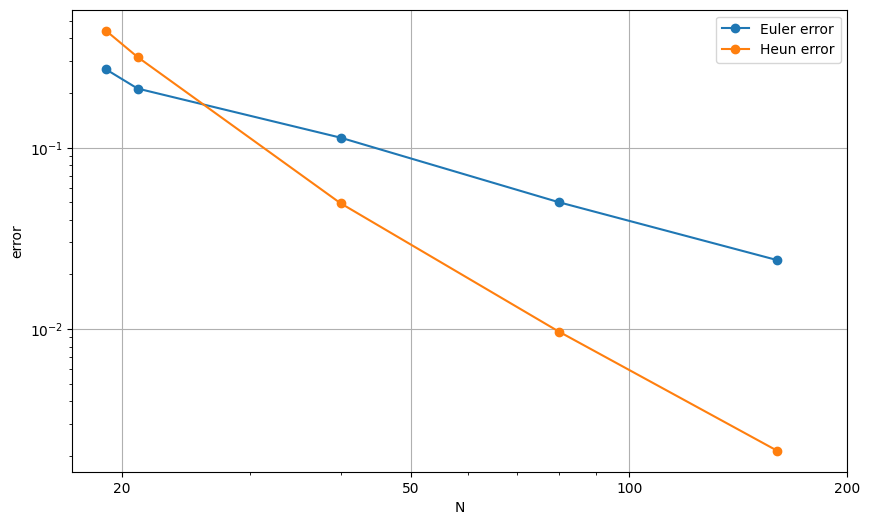

In [119]:
plt.figure(figsize=(10, 6))

plt.xlabel('N')
plt.ylabel('error')
plt.loglog(N_values, e_fe, 'o-', label="Euler error")
plt.loglog(N_values, e_Heun, 'o-', label="Heun error")
plt.legend()
plt.grid(True)
plt.xticks([20, 50, 100, 200], [20, 50, 100, 200])

plt.show()

Let us find the slopes of the segments connecting successive points to estimate the order of convergence.

For the Euler method we have:

In [120]:
[(math.log(e_fe[k+1])-math.log(e_fe[k]))/ \
 (math.log(N_values[k+1])-math.log(N_values[k])) \
    for k in range(len(N_values)-1)]

[-2.431651530984531,
 -0.9674071313345121,
 -1.1821701332225774,
 -1.0602602005867527]

While for Heun's method we have:

In [114]:
[(math.log(e_Heun[k+1])-math.log(e_Heun[k]))/ \
 (math.log(N_values[k+1])-math.log(N_values[k])) \
    for k in range(len(N_values)-1)]

[-3.334908488117307,
 -2.8803143633786807,
 -2.3506247615197897,
 -2.181551265614509]

Thus in this case we see for Euler's method the rate of convergence is of the order h, while for Heun's method it is around h^2. This is exactly what we expected as we saw in the lectures.

Question 1(d)

For N large enough (in our case N>20), both Euler's method and Heun's method replicate the asymptotic behaviour of the solution, that is, the horizontal asymptote. 

The value of y(20) is very well approximated by both methods as long as N>20 (for N>40 the difference is negligible).

In [113]:
e_fe_end, e_Heun_end

([0.2110648658000196, 0.0062097521785129395, 0.0, 0.0, 2.220446049250313e-16],
 [0.36335664624898156,
  0.03595539230300626,
  1.0494938251781605e-12,
  1.1102230246251565e-16,
  2.220446049250313e-16])

We observe in the numerical plots above that solutions are stable for every N that is >20, in other words, when the step size is 20/N<1. This agrees with the theory. 

The instability in the case where N=19 is manifested in different ways for the two methods. For Euler's method, the solution fluctuates in a divergent way around the asymptote y=1. For Heun's method, the solution is very stable (no fluctuations), but develops an asymptote too early at around y=0.63 instead of y=1.